### Example 3

Refer to [/examples/time_series/generate_data.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/generate_data.ipynb) for the artificial time-series dataset (used in this example) generation  

|Case|LSTM Shuffled|Dense Shuffled|LSTM Not Shuffled|Dense Not Shuffled|
|-|-|-|-|-|
|Example Number|[2](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/2.ipynb)|3|[7](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/7.ipynb)|[17](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/17.ipynb)|
|ID|0_1_0_3_128_1_0_1_0_0|0_1_0_3_128_1_1_1_0_0|0_1_0_3_128_1_0_0_0_0|0_1_0_3_128_1_1_0_0_0|
|Total params|17,185|18,753|17,185|18,753|
|Total time (min)|1.5|0.3|2.3|0.3|
|Num of epochs|49|37|78|26|
|Time per epoch (s)|1.79|0.51|1.78|0.60|
|Train RMSE|0.53|0.63|0.57|0.79|
|Test RMSE|0.58|0.88|0.64|0.98|

- LSTM performs better than MLP when there is a relatively complex within window input/output relationship
- Shuffling inputs improves the performance both for MLP (multi layer perceptron or dense) and LSTM
- MLP is much faster than LSTM with similar size in terms of training times

Previous example: [/examples/time_series/cases/2.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/2.ipynb)  
Next example: [/examples/time_series/cases/4.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/4.ipynb)

In [1]:
import sys
sys.path.insert(0, '../') # To be able to reach 'functions.py'
sys.path.insert(0, '../../../') # To be able to reach 'datasets' folder
import functions as fn

In [2]:
# Do the settings in this cell and run all
class Train_Sets:
    vers = 0 # 0 or 1
    within = 1 # 0 or 1
    inter = 0 # 0 or 1
    numOfSens = 3 # 1 or 2 or 3
    batchSize = 128 # (2 ** 0) or ... or (2 ** 8)
    useHalf = True # False or True
    dense = True # False or True
    shuffle = True # False or True
    stateful = False # False or True
    resetStates = False # False or True

In [3]:
Train_Sets, Paths = fn.init(Train_Sets)

ID: 0_1_0_3_128_1_1_1_0_0


In [4]:
X_train, X_val, X_test, y_train, y_val, y_test = fn.split_data(Train_Sets)

X_train shape:      (9216, 32, 3)
y_train shape:      (9216,)
X_val shape:        (3072, 32, 3)
y_val shape:        (3072,)
X_test shape:       (3072, 32, 3)
y_test shape:       (3072,)
Common data type:   <class 'numpy.float32'>


In [5]:
model, df, train_time = fn.get_model(Train_Sets, X_train, X_val, y_train, y_val)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/128


2022-12-11 22:38:28.771285: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-11 22:38:28.771574: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-11 22:38:28.937900: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-11 22:38:29.145724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


72/72 [==============================] - 1s 10ms/step - loss: 8.2153 - root_mean_squared_error: 2.8662 - mean_absolute_error: 2.1114 - val_loss: 2.5491 - val_root_mean_squared_error: 1.5966 - val_mean_absolute_error: 1.2658
Epoch 2/128
 1/72 [..............................] - ETA: 0s - loss: 3.6804 - root_mean_squared_error: 1.9184 - mean_absolute_error: 1.4680

2022-12-11 22:38:29.904619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


72/72 [==============================] - 1s 7ms/step - loss: 2.5848 - root_mean_squared_error: 1.6077 - mean_absolute_error: 1.2658 - val_loss: 1.8680 - val_root_mean_squared_error: 1.3668 - val_mean_absolute_error: 1.0810
Epoch 3/128
72/72 [==============================] - 1s 7ms/step - loss: 1.9671 - root_mean_squared_error: 1.4025 - mean_absolute_error: 1.1074 - val_loss: 1.6276 - val_root_mean_squared_error: 1.2758 - val_mean_absolute_error: 1.0097
Epoch 4/128
72/72 [==============================] - 1s 7ms/step - loss: 1.6581 - root_mean_squared_error: 1.2877 - mean_absolute_error: 1.0240 - val_loss: 1.3755 - val_root_mean_squared_error: 1.1728 - val_mean_absolute_error: 0.9321
Epoch 5/128
72/72 [==============================] - 0s 7ms/step - loss: 1.4643 - root_mean_squared_error: 1.2101 - mean_absolute_error: 0.9613 - val_loss: 1.2804 - val_root_mean_squared_error: 1.1316 - val_mean_absolute_error: 0.8947
Epoch 6/128
72/72 [==============================] - 0s 7ms/step - loss:

In [6]:
model.summary()

Model: "0_1_0_3_128_1_1_1_0_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense1 (Dense)              (None, 64)                6208      
                                                                 
 dense2 (Dense)              (None, 96)                6240      
                                                                 
 dense3 (Dense)              (None, 32)                3104      
                                                                 
 dense4 (Dense)              (None, 32)                1056      
                                                                 
 dense5 (Dense)              (None, 32)                1056      
                                                                 
 drop0.0625 (Dropout)        (None, 32)      

In [7]:
fn.train_info(df, train_time)

Total training time:          0.3 min
Num of epochs:                37
Best val RMSE epoch:          29
Training time per epoch:      0.51 sec


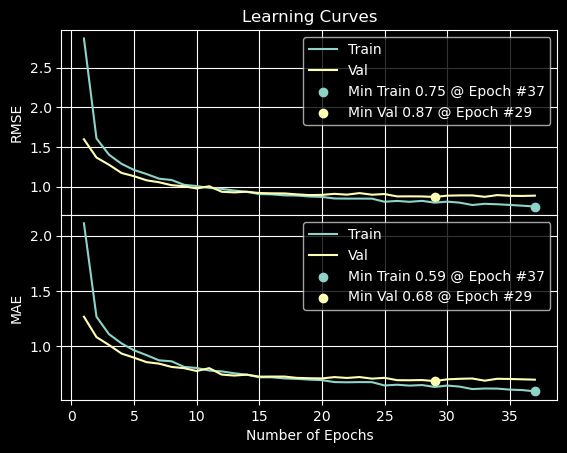

In [8]:
fn.plot_learn_curve(df)

In [9]:
y_train_pred, y_val_pred, y_test_pred = fn.get_predictions(Train_Sets, model, X_train, X_val, X_test)

2022-12-11 22:38:49.235324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


y_train_pred shape: (9216,)
y_val_pred shape:   (3072,)
y_test_pred shape:  (3072,)
Common data type:   <class 'numpy.float32'>


mse_train:     0.39
mse_val:       0.76
mse_test:      0.78
rmse_train:    0.63
rmse_val:      0.87
rmse_test:     0.88
mae_train:     0.50
mae_val:       0.68
mae_test:      0.69


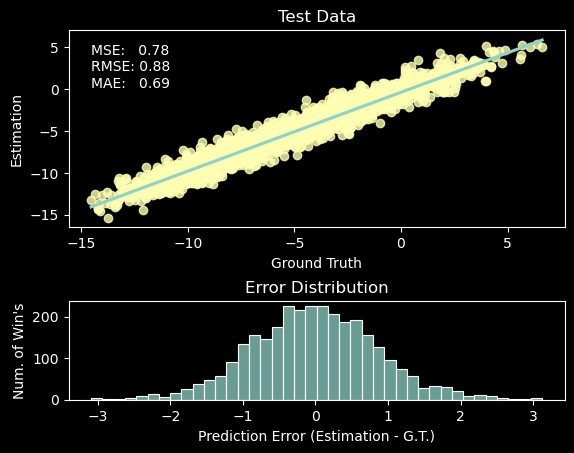

In [10]:
fn.evaluate_model(y_train, y_val, y_test, y_train_pred, y_val_pred, y_test_pred)

Previous example: [/examples/time_series/cases/2.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/2.ipynb)  
Next example: [/examples/time_series/cases/4.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/4.ipynb)